## Build a machine learning model to predict whether a person makes over 50K a year or not

### Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.path.append('/home/admin1/PycharmProjects/Models in Machine Learning/')
from ipynb.fs.full.ml_library import *

# reading dataset from file & storing as pandas dataframe
personal_data = pd.read_csv('personal data.csv',names=[
"Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
"Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
"Hours per week", "Country", "Target"])
personal_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
personal_data.isna().sum()         # checking null values

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [3]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           32561 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# mapping target variable i.e. column 'Target' to 0 & 1
# mapping  ' <=50K' -> 0  &  ' >50K' -> 1
personal_data.loc[personal_data['Target'] == ' >50K', 'Target'] = 1
personal_data.loc[personal_data['Target'] == ' <=50K', 'Target'] = 0
personal_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Checking all features have contributed to target variable or not

In [5]:
personal_data.groupby('Target').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
Target,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [6]:
personal_data.groupby('Workclass').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Workclass,,,,,,,
?,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390,0.104031
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167,0.386458
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800,0.294792
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571,0.000000
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096,0.218673
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100,0.557348
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881,0.284927
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587,0.271957
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286,0.000000


In [7]:
personal_data.groupby('Education').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Education,,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519,0.066452
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957,0.051064
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600,0.076212
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952,0.035714
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898,0.048048
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873,0.061920
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747,0.052529
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217,0.248360
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709,0.261216


In [8]:
personal_data.groupby('Marital Status').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Marital Status,,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680,0.104209
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435,0.434783
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856,0.446848
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856,0.081340
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998,0.045961
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463,0.064390
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859,0.085599


In [9]:
personal_data.groupby('Occupation').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Occupation,,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131,0.103635
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355,0.134483
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667,0.111111
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221,0.226641
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703,0.484014
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940,0.115694
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445,0.062774
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744,0.124875
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669,0.041578


In [10]:
personal_data.groupby('Relationship').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Relationship,,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139,0.448571
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665,0.103070
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116,0.037717
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337,0.013220
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018,0.063262
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607,0.475128


In [11]:
personal_data.groupby('Race').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Race,,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232,0.115756
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045,0.265640
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855,0.123880
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635,0.092251
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100,0.255860


In [12]:
personal_data.groupby('Sex').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Sex,,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361,0.109461
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086,0.305737


In [13]:
personal_data.groupby('Country').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Country,,,,,,,
?,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864,0.250429
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737,0.368421
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959,0.322314
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667,0.266667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797,0.033898
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895,0.263158
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429,0.028571
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429,0.142857
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453,0.084906


#### Deleting unnecessary columns

In [14]:
# dropping column fnlwgt & Hours per week
personal_data = personal_data.drop(['fnlwgt','Age','Education-Num'], axis=1)
personal_data.head()

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [15]:
personal_data.describe()

,Capital Gain,Capital Loss,Hours per week,Target
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,1077.648844,87.303830,40.437456,0.240810
std,7385.292085,402.960219,12.347429,0.427581
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,40.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000
75%,0.000000,0.000000,45.000000,0.000000
max,99999.000000,4356.000000,99.000000,1.000000


#### Feature Scaling 

In [16]:
# scaling valures for columns age, capital gain & capital loss in range 0-1
numerical_cols = [col for col in personal_data.columns if personal_data[col].dtype == 'int64']

for col in numerical_cols:
    minimum = personal_data[col].min()
    maximum = personal_data[col].max()
    personal_data[col] = (personal_data[col] -minimum)/(maximum - minimum)

personal_data.head()

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,0.0


### Checking correlations between different feature columns 

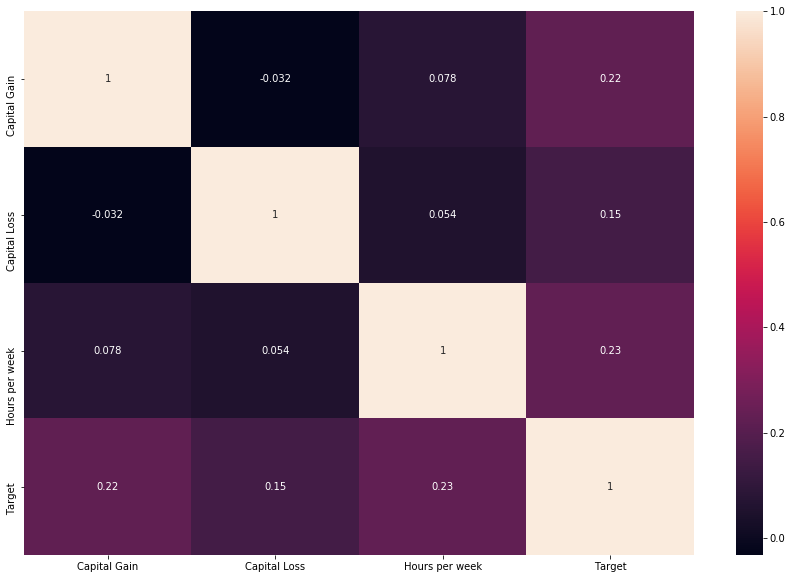

In [17]:
# checking if any pair of feature columns well correlated so that we can remove one of it
plt.figure(figsize=(15,10))
sns.heatmap(personal_data.corr(), annot=True)
plt.show()

In [18]:
# Not deleting any column as no any pair of correlated columns

#### Handling categorical columns

In [19]:
# converted categorical data into number-wise category
# if only 2 categories then 0 & 1  i.e.  (no / yes)
# else new columns for categories

# finding categorical columns
categorical_col = [col for col in personal_data.columns if personal_data[col].dtype == 'O']

for col in categorical_col:
    # sorting ccatories of the column
    categories = sorted(personal_data[col].unique())
    if len(categories) == 2:
        code = 0
        for category in categories:
            personal_data.loc[personal_data[col] == category, col] = code
            code += 1

categorical_col = [col for col in personal_data.columns if personal_data[col].dtype == 'O']

for col in categorical_col:
    categories = sorted(personal_data[col].unique())
    for category in categories:
        personal_data[category] = np.zeros(len(personal_data))
    
for col in categorical_col:
    categories = sorted(personal_data[col].unique())
    for category in categories:
        personal_data.loc[personal_data[col] == category, category] = 1
    
personal_data.drop(categorical_col, axis=1, inplace=True)
personal_data.head()

,Sex,Capital Gain,Capital Loss,Hours per week,Target,?,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
personal_data.head()

,Sex,Capital Gain,Capital Loss,Hours per week,Target,?,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting data into train set & test set

In [21]:
# 70% as train set & remaining 30% as test set
train, test = splitting_dataset(personal_data)
print('Train set')
print(train.shape)
train.head()

Train set
(22793, 103)


,Sex,Capital Gain,Capital Loss,Hours per week,Target,?,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
17650,1,0.0,0.433196,0.397959,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1002,0,0.0,0.000000,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11957,0,0.0,0.000000,0.397959,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4669,1,0.0,0.000000,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28486,1,0.0,0.000000,0.602041,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
print('Test set')
print(test.shape)
test.head()

Test set
(9768, 103)


,Sex,Capital Gain,Capital Loss,Hours per week,Target,?,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
2,1,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.140841,0.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,1,0.000000,0.0,0.806122,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Creating predictors & target variables in both dataset

In [23]:
def create_pred_target(data):   
    """Function returns predictors' matrix & target variable's array for given dataset"""
    y_values = np.array(data['Target'])
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'Target':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)
    
    return x_values, y_values

train_x_values, train_y_values = create_pred_target(train)
test_x_values, test_y_values = create_pred_target(test)

### Building logistic regression model

In [24]:
total = len(train)        # total training records

# initialising all parameters (theta0, theta1,...theta12) to 0 
theta = np.zeros(len(train_x_values))

# defining prediction fn using sigmoid function
predict = lambda x_values: 1/(1 + np.exp(-(theta.dot(x_values))))
    
# defining derivative of cost function
def derivate_cost_func(row):
    return (predict(train_x_values) - train_y_values).dot(train_x_values[row])/total

iterations = 500
alpha = 0.1
    
for _ in range(iterations):
    theta_copy = np.copy(theta)
    for index in range(len(theta_copy)):
        theta[index] = theta_copy[index] - alpha * derivate_cost_func(index)
    

In [25]:
# printing final parameters theta0,theta1,.....,theta(n)
theta

array([-7.58028589e-01,  4.35987210e-02,  2.62716702e-01,  1.97060930e-01,
        5.19084994e-02, -3.40229864e-01,  8.84270993e-02, -6.57387520e-02,
       -1.24760387e-03, -3.25273153e-01,  1.77458934e-01, -2.19237047e-01,
       -7.51844465e-02, -6.16709321e-03, -2.00406162e-01, -2.36987347e-01,
       -8.48910906e-02, -5.93103168e-02, -1.20771427e-01, -2.16215503e-01,
       -1.51035508e-01, -1.63716599e-02, -4.92120291e-02,  4.02752967e-01,
        1.90891627e-01, -5.74058647e-01,  4.03015595e-01, -1.96546810e-02,
        2.54069094e-01, -2.60866987e-01, -2.59976113e-01,  6.97531373e-03,
        7.16782168e-01, -6.10013668e-02, -9.05813585e-01, -1.27512285e-01,
       -1.05855408e-01, -1.81557289e-01, -1.18056297e-03, -1.96378569e-01,
        5.89886825e-01, -2.16498314e-01, -2.21306160e-01, -2.66389181e-01,
       -4.87372685e-01, -2.54440159e-02,  5.01134557e-01,  2.47536170e-02,
        1.04198936e-01,  8.78184067e-02, -1.32901881e-01,  4.75772528e-01,
       -3.04978307e-01, -

#### Storing predictions for train set & test set

In [26]:
train_predicted_values = predict(train_x_values)
test_predicted_values = predict(test_x_values)

In [27]:
# categorising each record to it's category
train_predicted_values = categorise_logistic(train_predicted_values)
test_predicted_values = categorise_logistic(test_predicted_values)

### Evaluating model against train & test set

In [28]:
accuracy_train_set = accuracy_classification(train_predicted_values, train_y_values)
accuracy_train_set

82.46391435967183

In [29]:
accuracy_test_set = accuracy_classification(test_predicted_values, test_y_values)
accuracy_test_set

82.54504504504504